Exploratory Data Analysis

In [67]:
# Importing the necessary libraries into the environment
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
# Load the "customer_churn" dataset into the environment
churn = pd.read_csv("customer_churn.csv")

In [69]:
# Displaying the first five rows of the churn datframe
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Checking the various attribute of the "churn" dataframe

In [70]:
# Displaying the number of rows and columns in the dataframe
churn.shape

(7043, 21)

In [71]:
# Displaying the columns of the in the dataframe
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [72]:
# Checking the datatype of all the columns in the dataframe
churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [73]:
# Checking the descriptive statistics of numerical variables in the given dataframe
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Insights so far as follows:
1. Senior Citizen column is a categorical column, hence the distribution is not proper.
2. 75 % of the customers have a tenure less than 55 months.
3. Average monthly changes is $64.76 and 25% pay more than $89.85 monthly.

Text(0.5, 1.02, 'Count of Target Variable per Category')

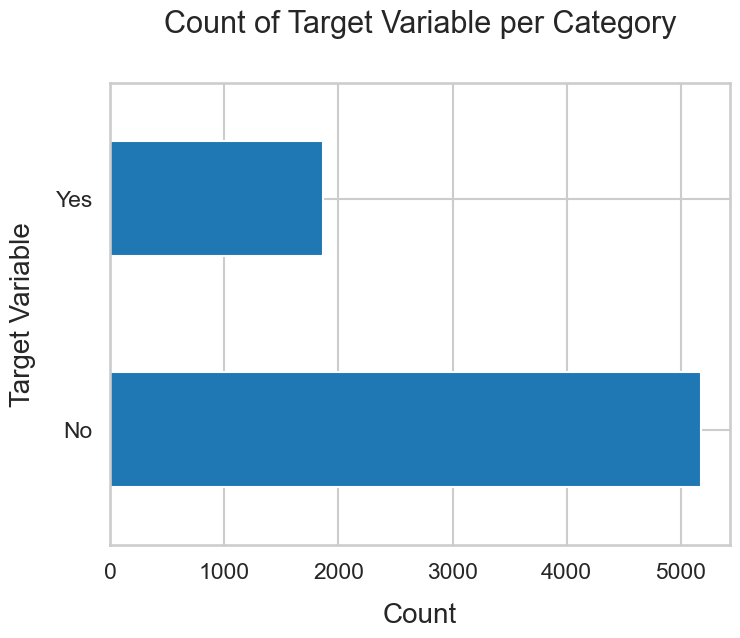

In [74]:
# Plot a horizontal bar graph to visualize the distribution of the target variable (Churn)
churn['Churn'].value_counts().plot(kind='barh', figsize=(8,6))
plt.xlabel('Count',labelpad=14)
plt.ylabel('Target Variable', labelpad=14)
plt.title('Count of Target Variable per Category', y=1.02)

In [75]:
# Calculate the percentage distribution of each category in the target variable
100*churn['Churn'].value_counts()/len(churn['Churn'])

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

The data is heavily imbalanced with the ration of 73:27; So, we need to analyze the data with other features while using the target value separately to get other insights.

In [76]:
# Getting the concise summary of the "churn" dataframe
churn.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [77]:
# Checking for missing values in the dataframe
churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

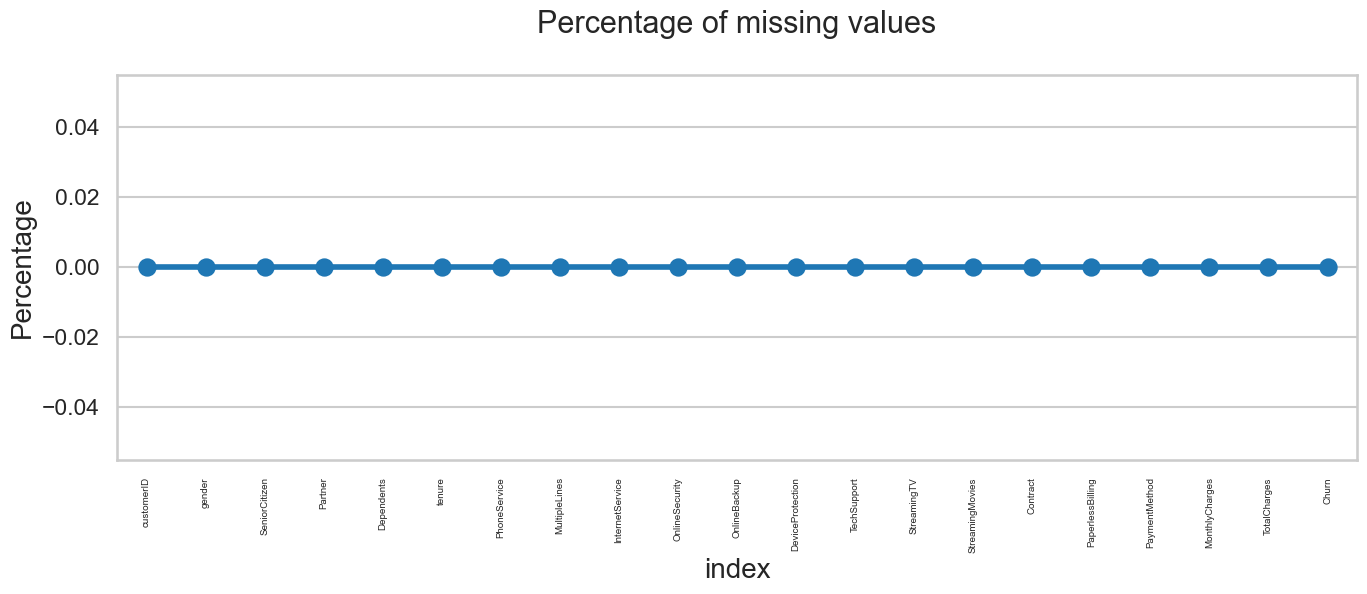

In [78]:
missing = pd.DataFrame(churn.isnull().sum() * 100 / churn.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of missing values")
plt.ylabel("Percentage")
plt.show()

Data Cleaning

In [79]:
# Create a copy of the data for manipulation and processing
churn_data = churn.copy()

In [80]:
# Converting the Total Charges into numeric values in the dataframe
churn_data['TotalCharges'] = pd.to_numeric(churn_data['TotalCharges'], errors='coerce')

# Checking for missing values after conversion
churn_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [81]:
# Checking the records with the null value in the Total Charges in the churn_data dataframe
churn_data.loc[churn_data['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Handling the missing values

In [82]:
# Dropping the missing rows from the dataframe
churn_data.dropna(how='any', inplace=True)

Create bins to segment customers based on their tenure

In [83]:
# Displaying the highest tenure in the dataframe
print(churn_data['tenure'].max())

72


In [84]:
# Grouping tenures into bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1,72,12)]

# Creating the tenure group label
churn_data["tenure_group"] = pd.cut(churn_data.tenure, range(1,80,12), right=False, labels=labels)

In [85]:
# Displaying the distribution of tenure
churn_data['tenure_group'].value_counts()

tenure_group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

In [86]:
# Dropping columns not required for processing
churn_data.drop(columns=['customerID', 'tenure'], axis=1, inplace=True)

# Displaying the first five rows of the dataframe
churn_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


Data Exploration

Performing Univariate Analysis

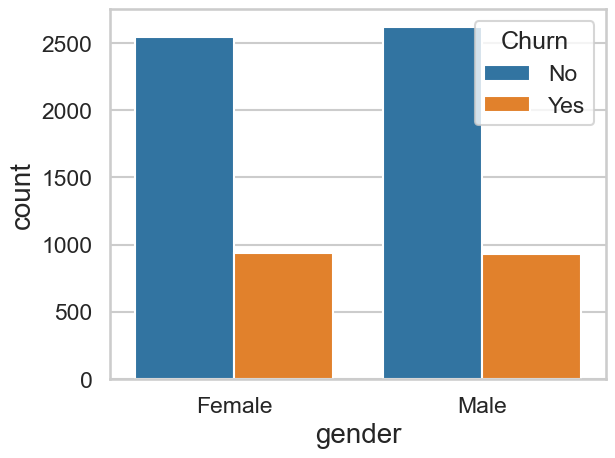

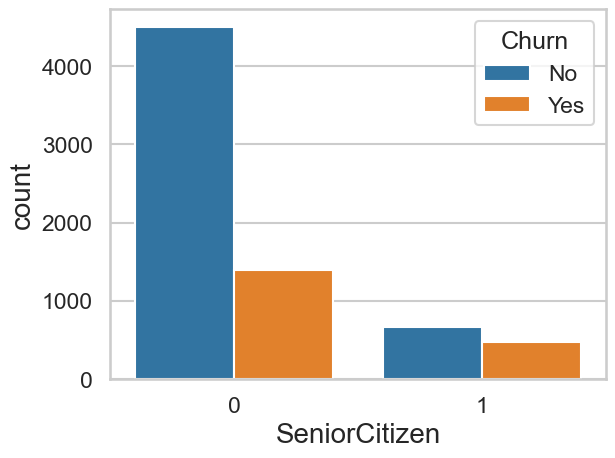

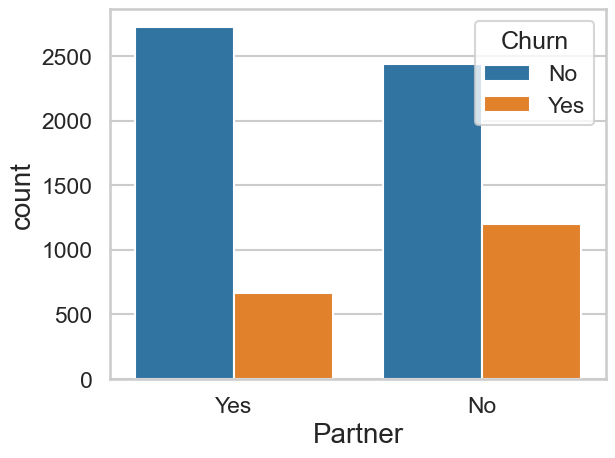

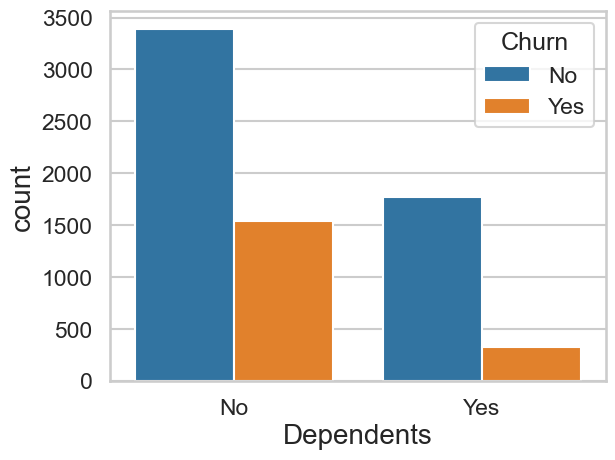

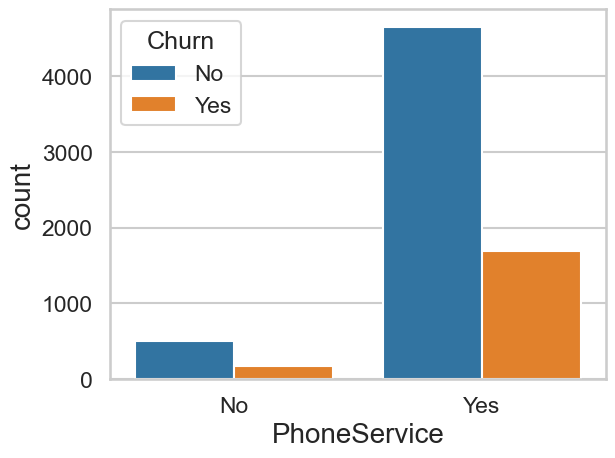

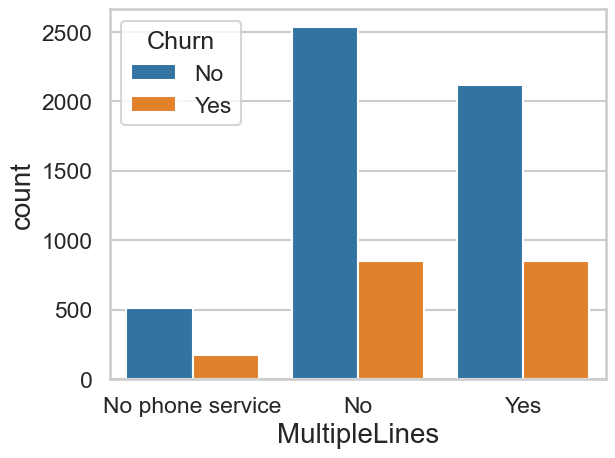

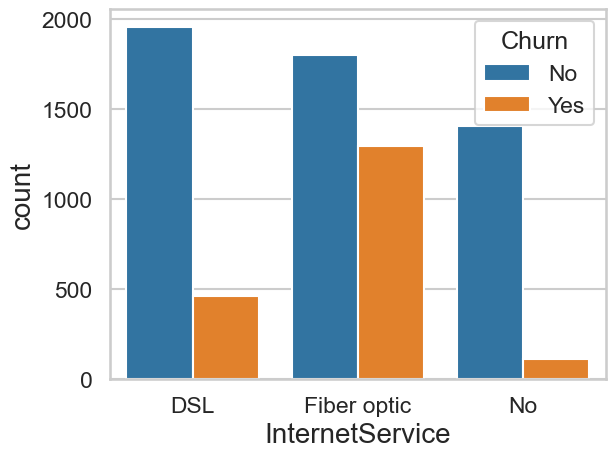

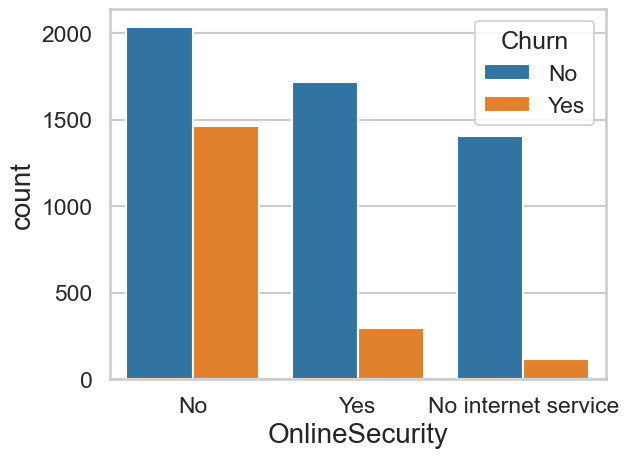

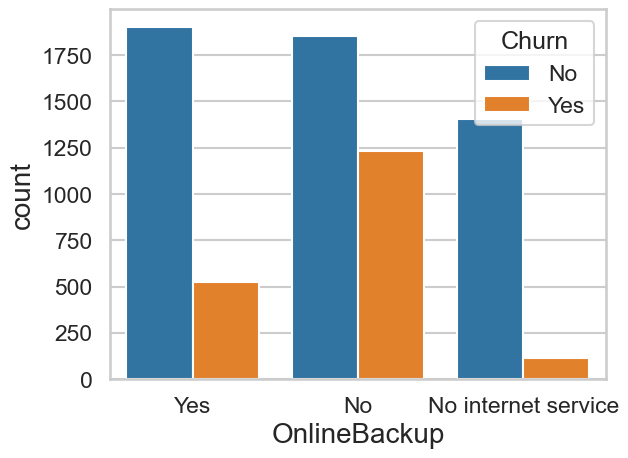

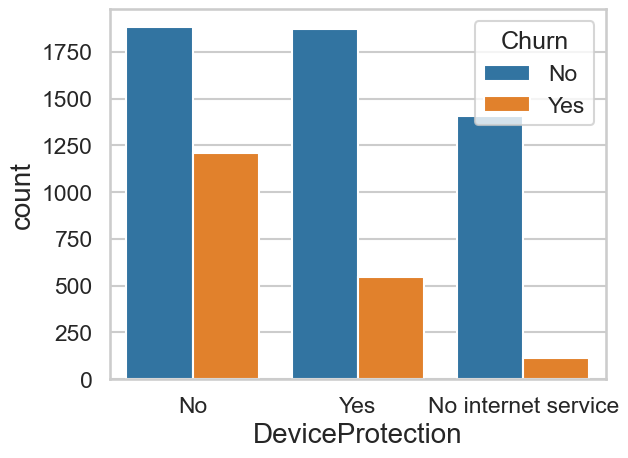

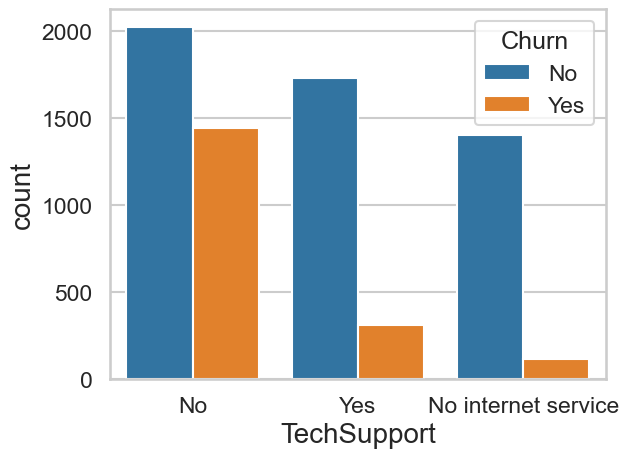

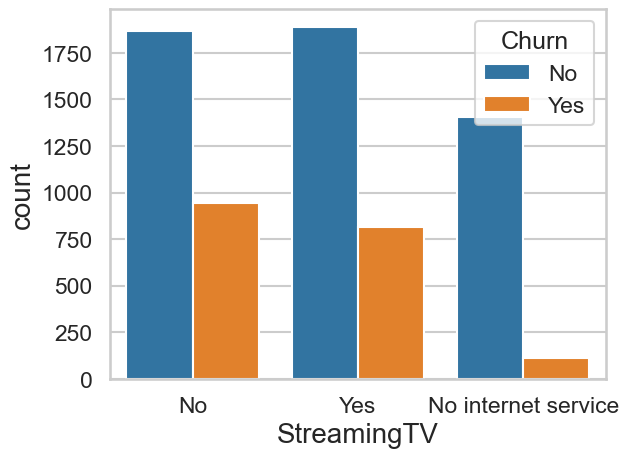

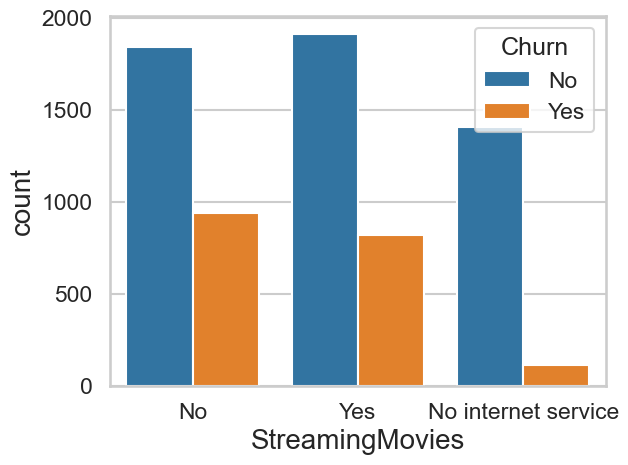

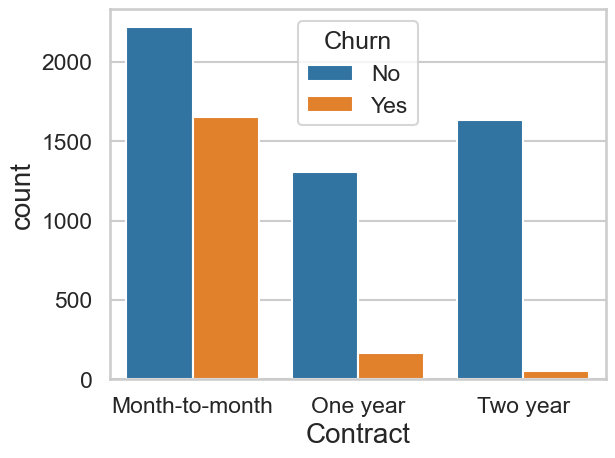

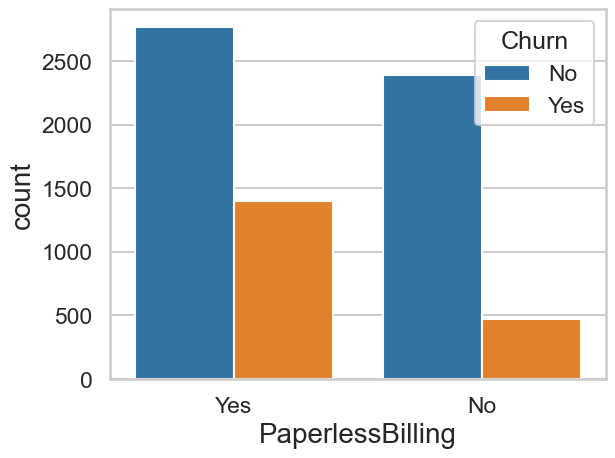

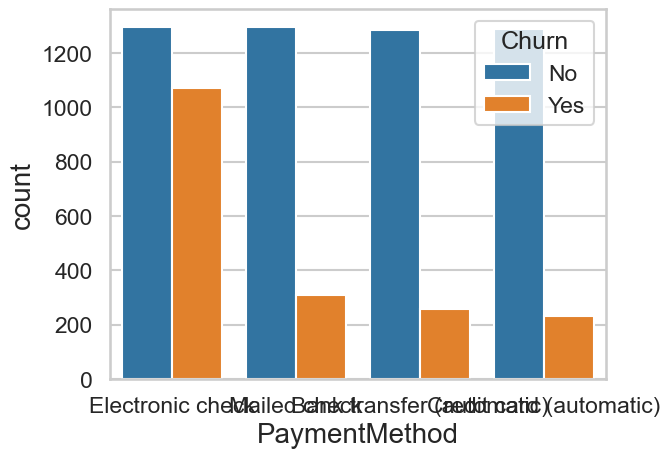

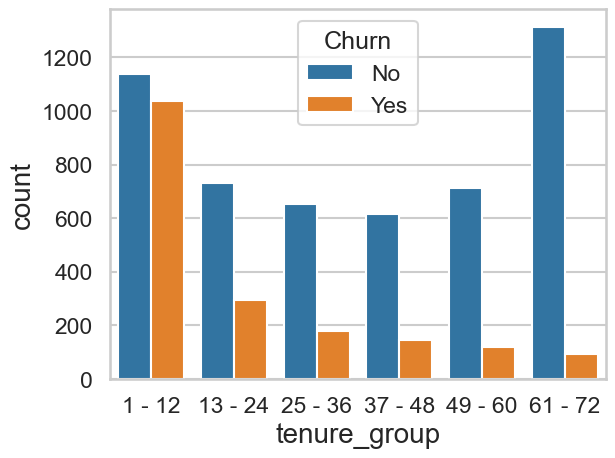

In [87]:
for i, predictor in enumerate(churn_data.drop(columns=["Churn","MonthlyCharges","TotalCharges"])):
    plt.figure(i)
    sns.countplot(data=churn_data, x=predictor, hue="Churn")

In [88]:
# Convert target variable "Churn" in a binary numeric variable (0 OR 1)
churn_data["Churn"] = np.where(churn_data["Churn"] == 'Yes',1,0)

In [89]:
# Displaying the first five rows of the "churn_data" dataframe
churn_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


In [90]:
# Convert categorical variables into dummy variables
churn_data_dummies = pd.get_dummies(churn_data)

# Displaying first five rows of the dataframe after performing one-hot encoding
churn_data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,1,False,True,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,0,False,True,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,1,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False


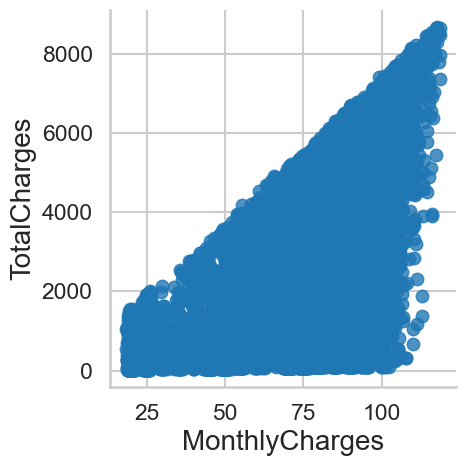

In [91]:
# Visulazing the relationship between Monthly Charges and Total Charges
sns.lmplot(data=churn_data_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

Total Charges increases as Monthly Charges increases

Text(0.5, 1.0, 'Monthly Charges by Churn')

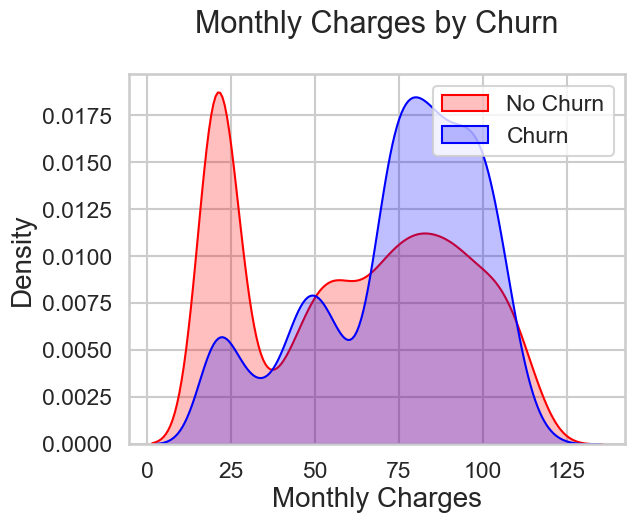

In [92]:
# Churn by Monthly Charges
month = sns.kdeplot(churn_data_dummies.MonthlyCharges[(churn_data_dummies['Churn']== 0)], color='Red', fill=True),
month = sns.kdeplot(churn_data_dummies.MonthlyCharges[(churn_data_dummies['Churn']== 1)], color='Blue', fill=True)
month.legend(["No Churn","Churn"],loc='upper right')
month.set_ylabel("Density")
month.set_xlabel("Monthly Charges")
month.set_title("Monthly Charges by Churn")

Churn is high when the monthly charges are high

Text(0.5, 1.0, 'Total Charges by Churn')

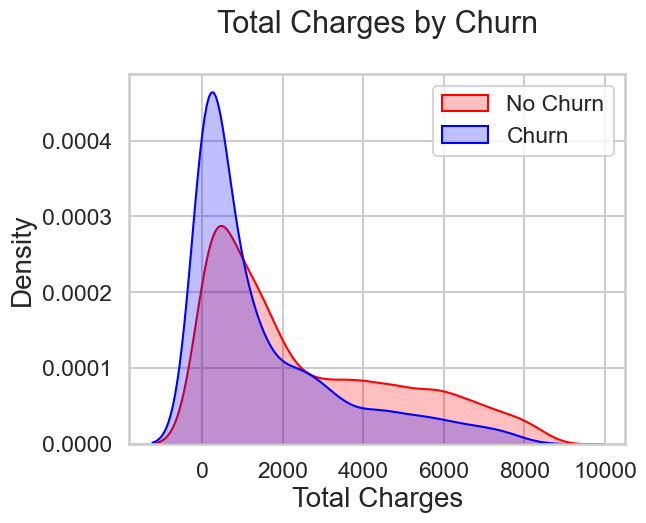

In [93]:
# Churn by Total Charges
month = sns.kdeplot(churn_data_dummies.TotalCharges[(churn_data_dummies['Churn']== 0)], color='Red', fill=True),
month = sns.kdeplot(churn_data_dummies.TotalCharges[(churn_data_dummies['Churn']== 1)], color='Blue', fill=True)
month.legend(["No Churn","Churn"],loc='upper right')
month.set_ylabel("Density")
month.set_xlabel("Total Charges")
month.set_title("Total Charges by Churn")

Lower the total charges, higher the churn. Hence, high monthly charge, lower tenure and lower total charge are linked to increase in churn

<Axes: >

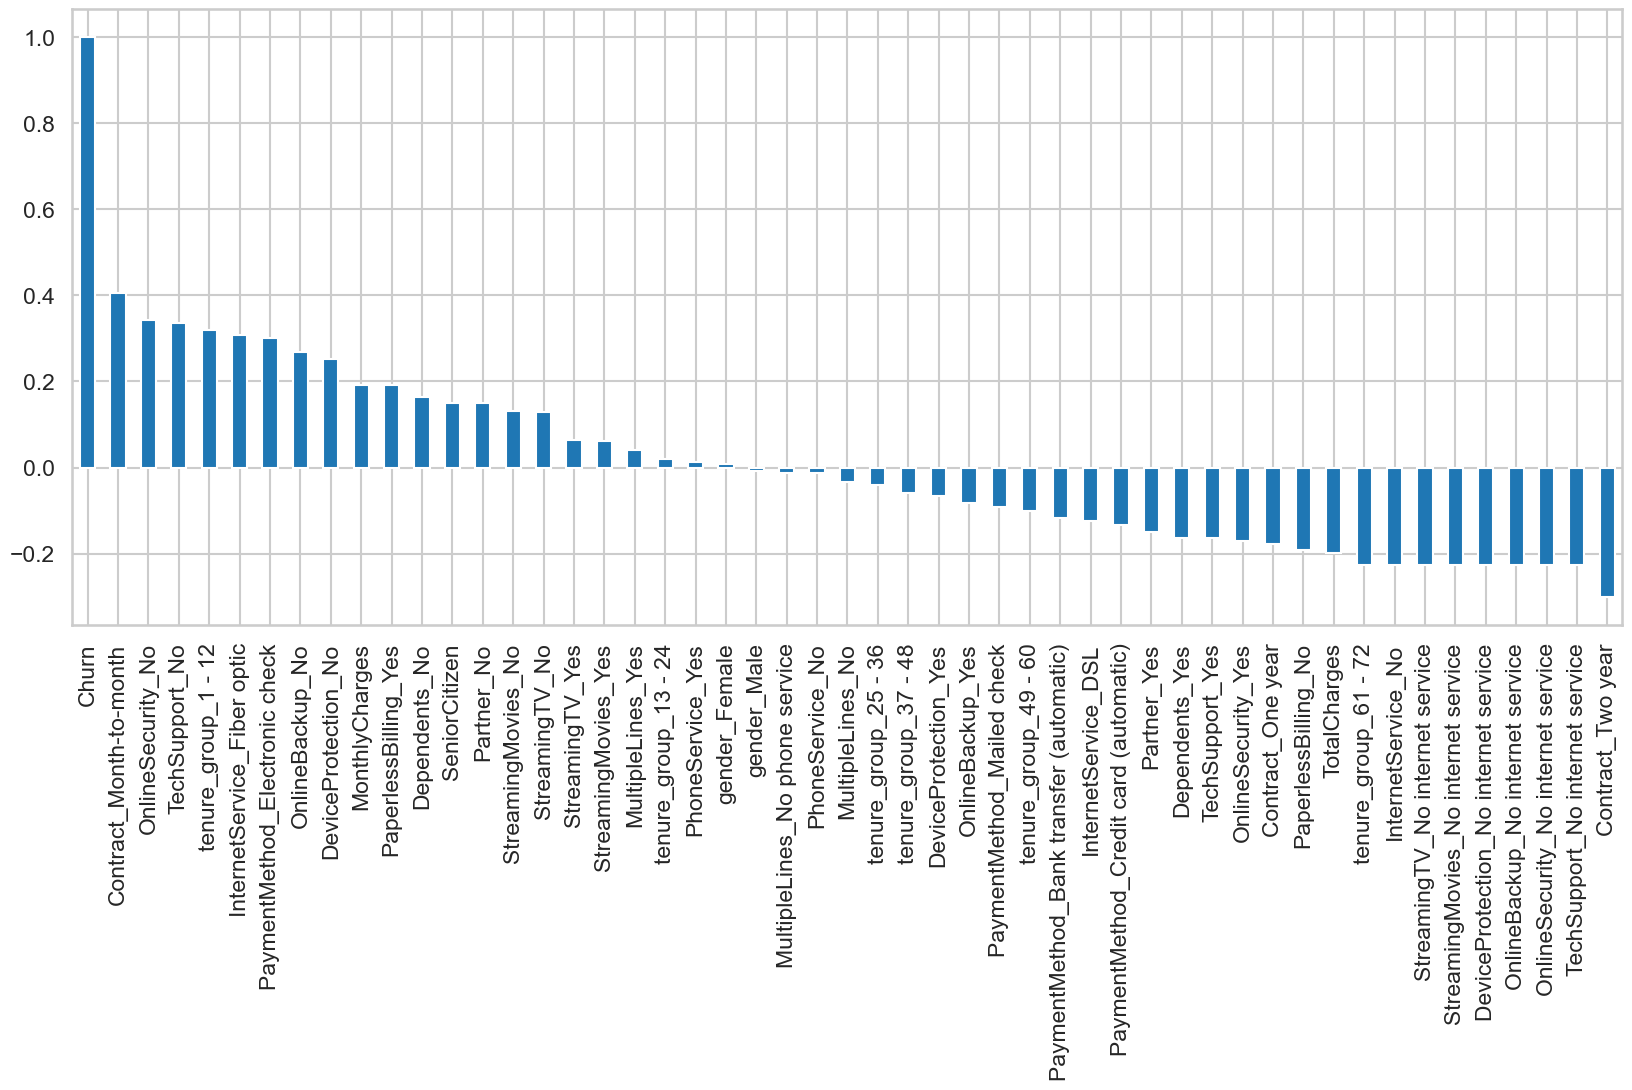

In [94]:
# Build correlation with all predictors w.r.t "Churn"
plt.figure(figsize=(20,8))
churn_data_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

<Axes: >

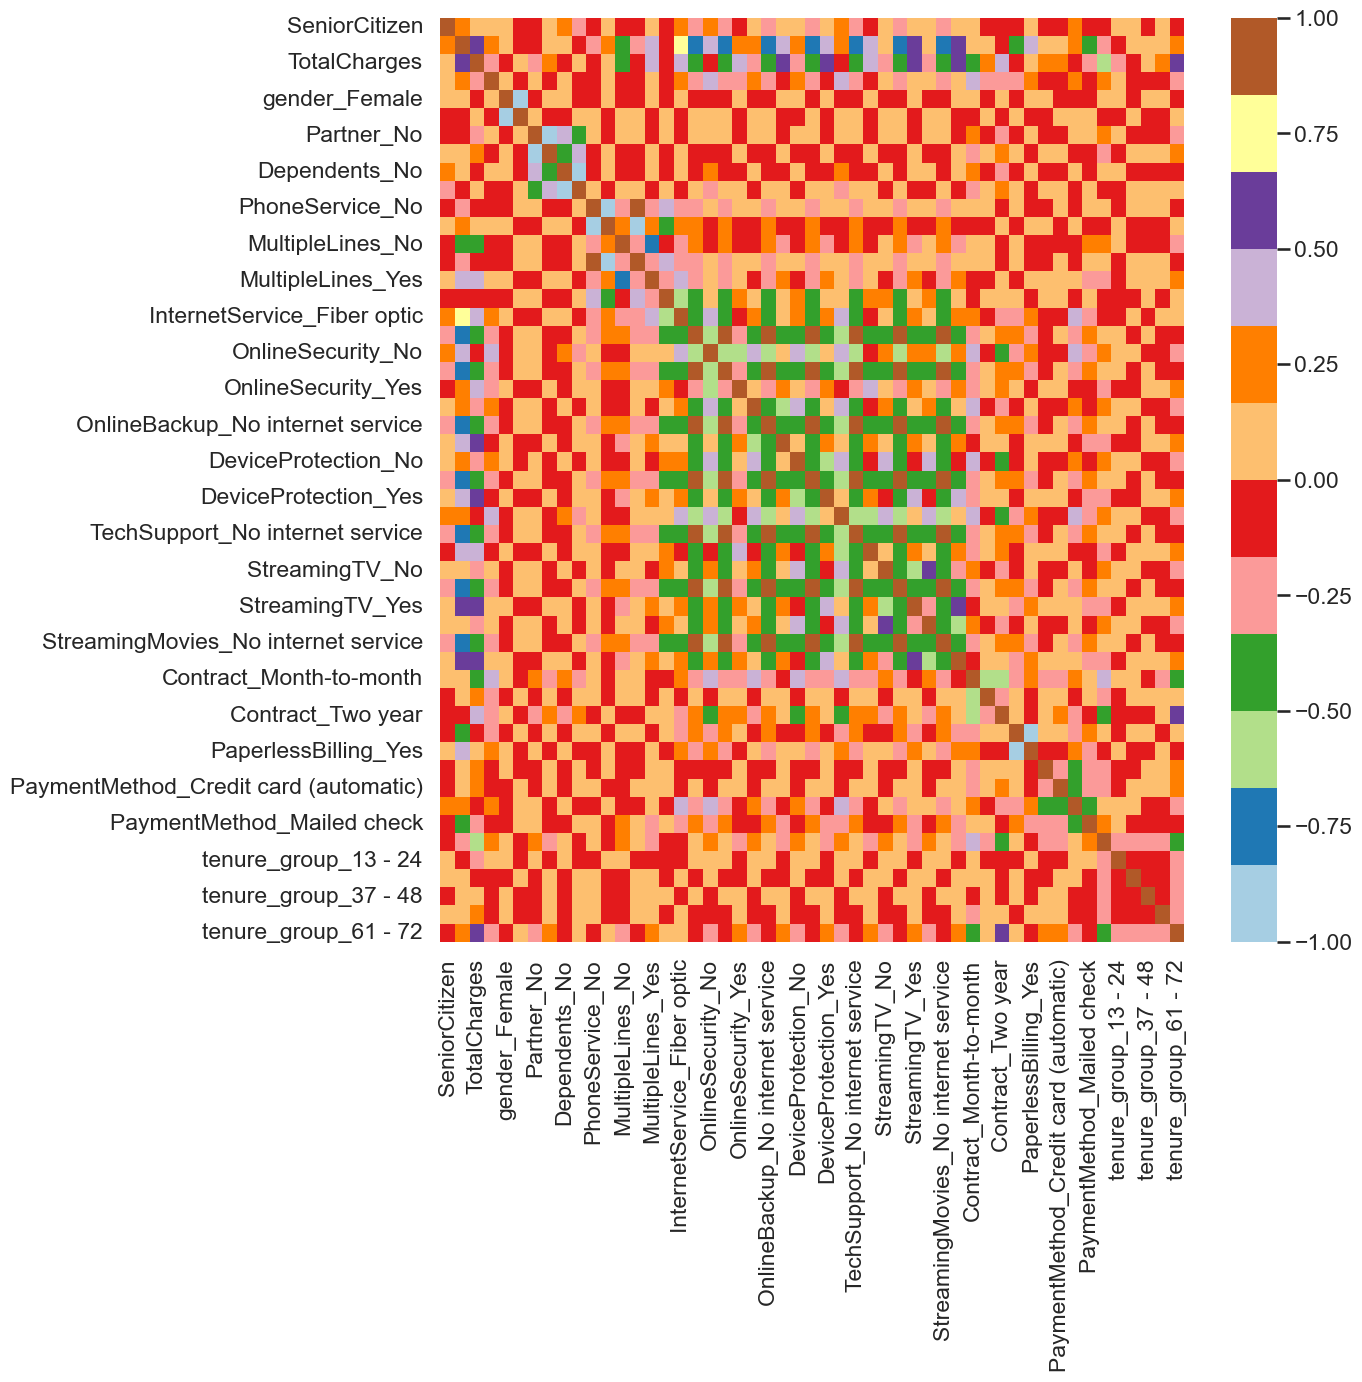

In [95]:
# Heat map
plt.figure(figsize=(12,12))
sns.heatmap(churn_data_dummies.corr(), cmap='Paired')

Bivariate Analysis

In [96]:
new_df1_target0=churn_data.loc[churn_data["Churn"]==0]
new_df1_target1=churn_data.loc[churn_data["Churn"]==1]
def uniplot(df, col, title, hue=None):

    sns.set_style('whitegrid')
    sns.set_context('talk')

    fig, ax = plt.subplots(figsize=(12, 6))
    plt.xticks(rotation=45)
    plt.title(title)

    sns.countplot(
        data=df,
        x=col,
        order=df[col].value_counts().index,
        hue=hue,
        palette='bright',
        ax=ax
    )

    plt.show()


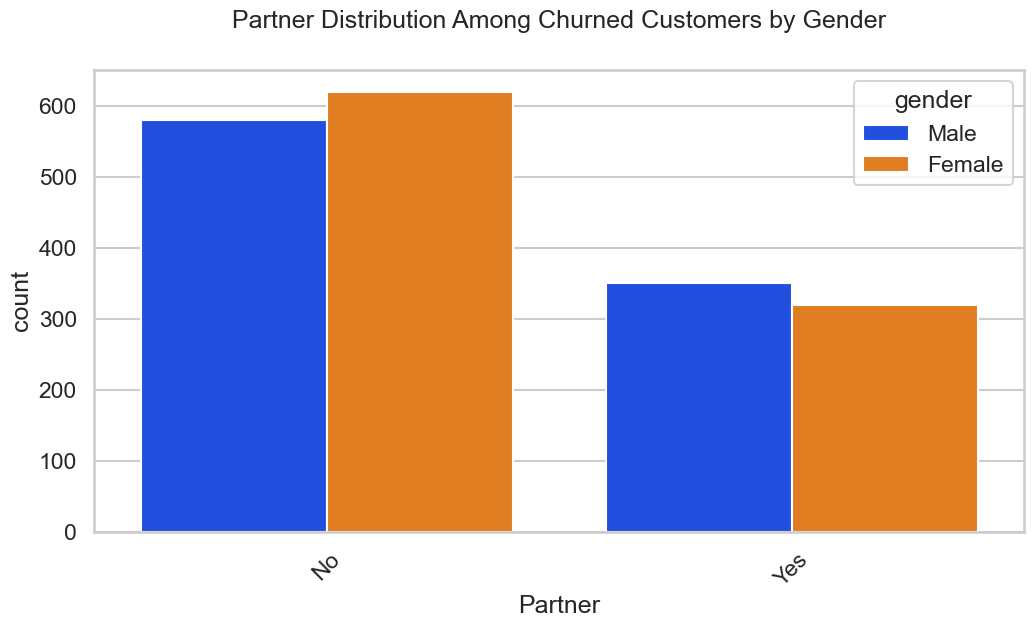

In [98]:
#
uniplot(new_df1_target1,col='Partner',title='Partner Distribution Among Churned Customers by Gender',hue='gender')

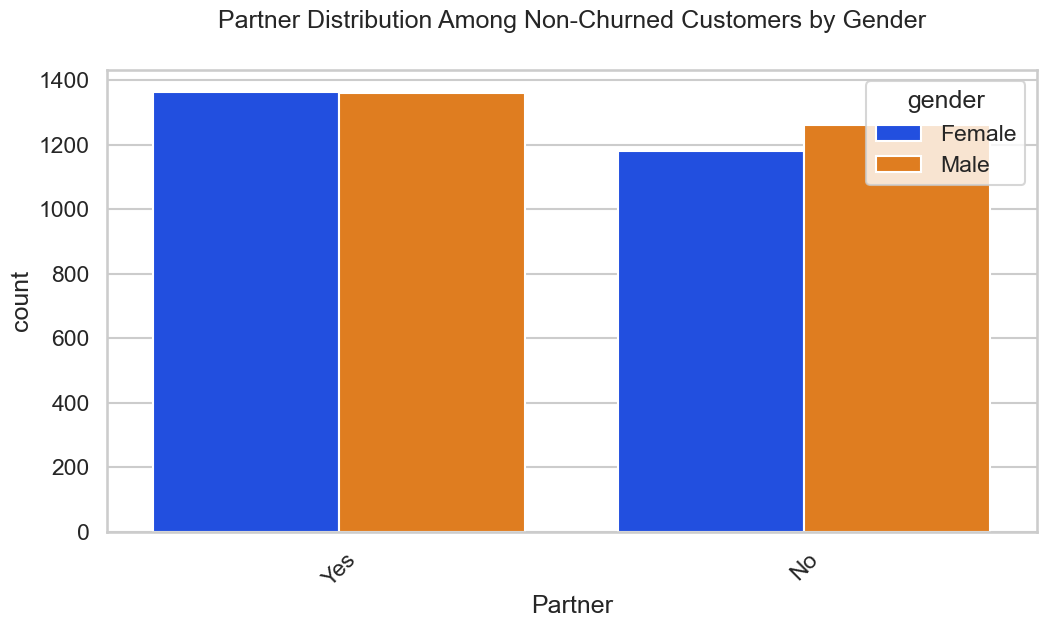

In [100]:
uniplot(new_df1_target0,col='Partner',title='Partner Distribution Among Non-Churned Customers by Gender',hue='gender')

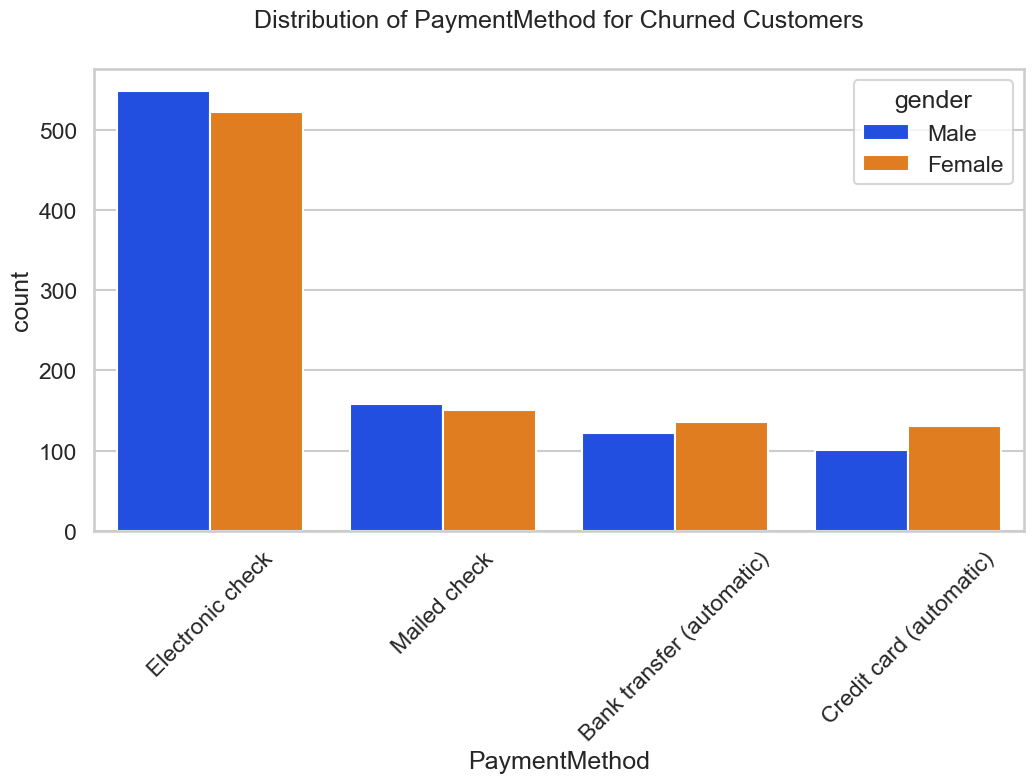

In [101]:
uniplot(new_df1_target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

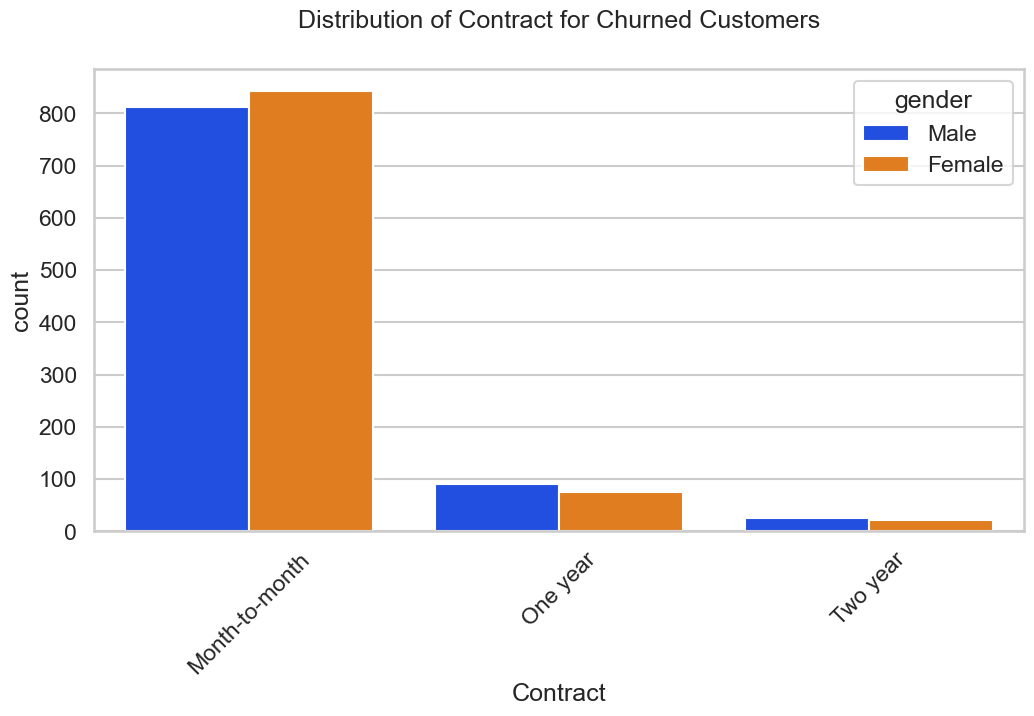

In [102]:
uniplot(new_df1_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

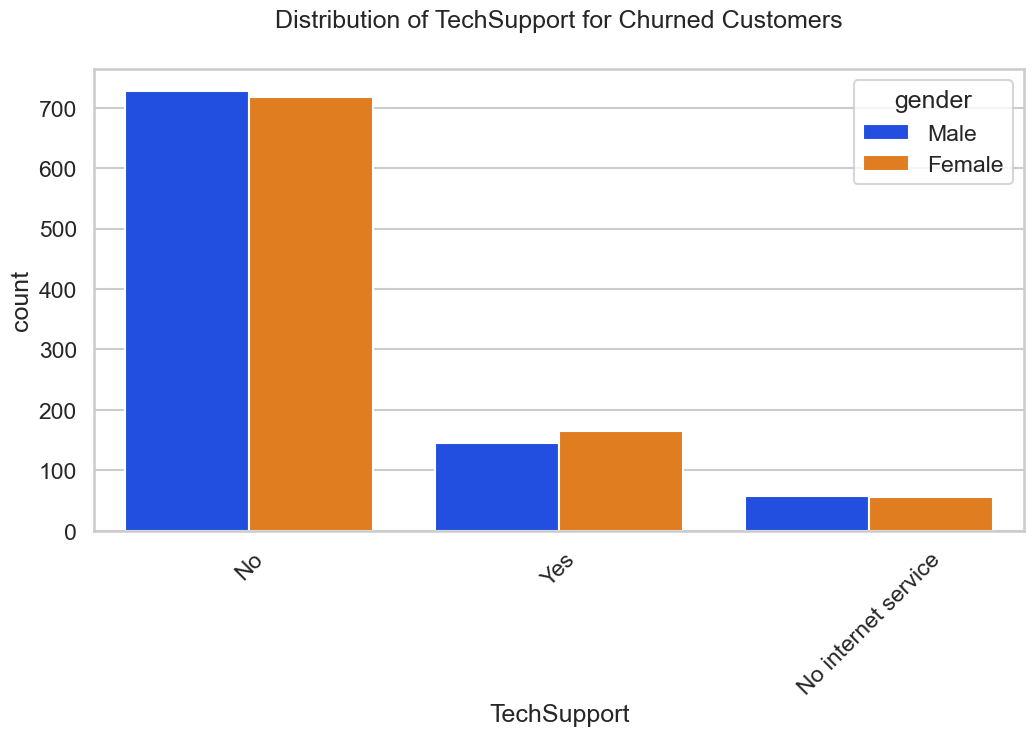

In [103]:
uniplot(new_df1_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

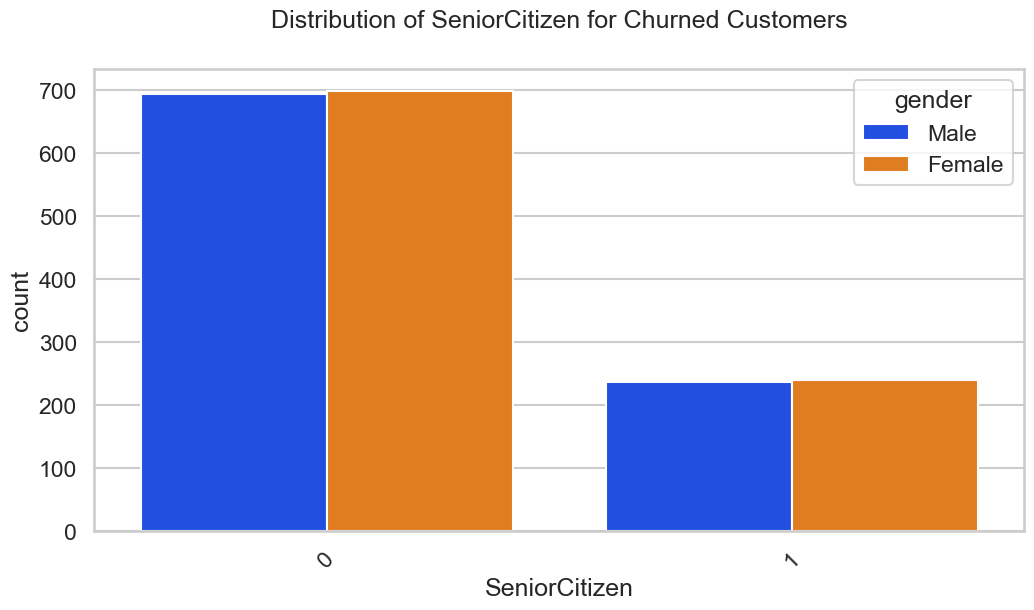

In [104]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

Highest churners are:
1. Customers using the payment method of Electronic check
2. Customers who are on a monthly contract
3. Customers with the lack of online security and tech support show hight churning rates
4. Customers below 60 years are most probable to churn

In [105]:
churn_data_dummies.to_csv('churn.csv')